In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lady = cv2.imread('test images/noise.png')
lady = cv2.cvtColor(lady,cv2.COLOR_BGR2RGB)

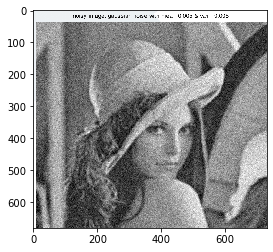

In [3]:
plt.imshow(lady)

In [4]:
lady_face = cv2.imread('test images/noise_face.png')
lady_face = cv2.cvtColor(lady_face,cv2.COLOR_BGR2RGB)

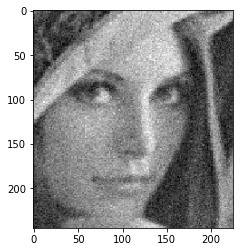

In [5]:
plt.imshow(lady_face)

In [6]:
lady.shape

(681, 731, 3)

In [7]:
lady_face.shape

(245, 225, 3)

In [8]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCOEFF_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

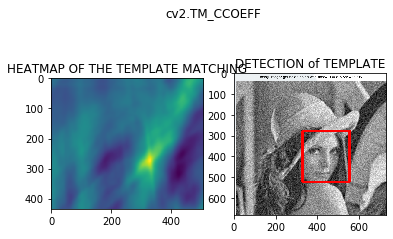

/n
/n


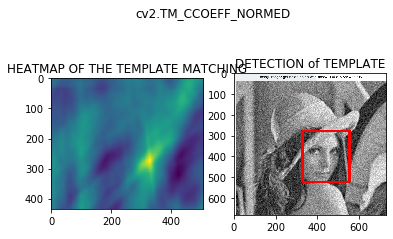

/n
/n


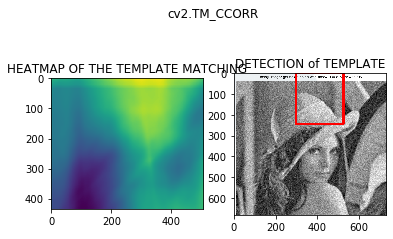

/n
/n


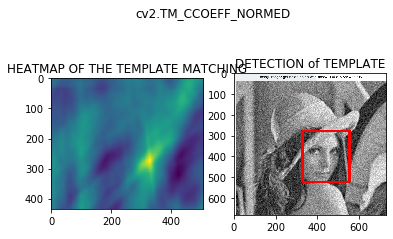

/n
/n


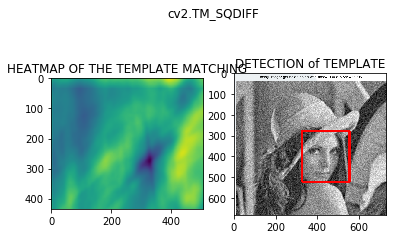

/n
/n


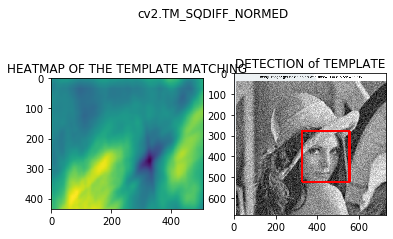

/n
/n


In [9]:
for m in methods:
    lady_copy = lady.copy()
    
    method = eval(m)
    
    #TEMPLATE MATCHING
    res = cv2.matchTemplate(lady_copy,lady_face,method) 
    min_value,max_value,min_loc,max_loc = cv2.minMaxLoc(res) 
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        
        # why min_loc because as you can see in the picture the TM_SQDIFF and TM_SQDIFF_NORMED
        # is showing the dark glow in the picture and that is our target glow
        # and this is the min_loc and everthing else is max_loc
        
        top_left = min_loc # x,y location
    else:
        top_left = max_loc
    
    height,width,channels = lady_face.shape
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(lady_copy,top_left,bottom_right,(255,0,0),10)
    
    # PLOT AND SHOW THE IMAGES
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF THE TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(lady_copy)
    plt.title('DETECTION of TEMPLATE')
    #TITLE WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    
    print('/n')
    print('/n')

In [10]:
my_methos = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(lady,lady_face,my_methos)

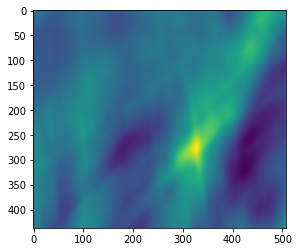

In [11]:
plt.imshow(res)